In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Read File

In [ ]:
pkg = pd.read_csv("package_tourism.csv")
rating = pd.read_csv("tourism_rating.csv")
id = pd.read_csv("tourism_with_id.csv")
user = pd.read_csv("user.csv")

In [ ]:
pkg

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN
...,...,...,...,...,...,...,...
95,96,Surabaya,Ekowisata Mangrove Wonorejo,Taman Harmoni Keputih,Taman Kunang-Kunang,Taman Ekspresi Dan Perpustakaan,Museum De Javasche Bank
96,97,Surabaya,Ciputra Waterpark,Kenjeran Park,Kebun Binatang Surabaya,Food Junction Grand Pakuwon,| Atlantis Land Surabaya
97,98,Surabaya,Museum Kesehatan Dr. Adhyatma,Patung Buddha Empat Rupa,Taman Hiburan Rakyat,Taman Bungkul,Taman Flora Bratang Surabaya
98,99,Surabaya,Taman Ekspresi Dan Perpustakaan,Museum De Javasche Bank,Surabaya Museum (Gedung Siola),Museum Mpu Tantular,Taman Air Mancur Menari Kenjeran


In [ ]:
rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [ ]:
id

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [ ]:
user

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


# Data Understanding

In [ ]:
pkg.shape

(100, 7)

In [ ]:
rating.shape

(10000, 3)

In [ ]:
id.shape

(437, 13)

In [ ]:
user.shape

(300, 3)

In [ ]:
print('Jumlah paket wisata : ', len(pkg.Package.unique()))
print('Jumlah rating  : ', len(rating.User_Id.unique()))
print('Jumlah tempat wisata  : ', len(id.Place_Id.unique()))
print('Jumlah user  : ', len(user.User_Id.unique()))

Jumlah paket wisata :  100
Jumlah rating  :  300
Jumlah tempat wisata  :  437
Jumlah user  :  300


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
#check missing value
rating.isna().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [ ]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


> Terdapat fitur yang tidak digunakan, maka dapat dihapus

In [ ]:
id= id.drop(['Description', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'], axis = 1)

In [ ]:
id

,Place_Id,Place_Name,Category
0,1,Monumen Nasional,Budaya
1,2,Kota Tua,Budaya
2,3,Dunia Fantasi,Taman Hiburan
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan
4,5,Atlantis Water Adventure,Taman Hiburan
...,...,...,...
432,433,Museum Mpu Tantular,Budaya
433,434,Taman Bungkul,Taman Hiburan
434,435,Taman Air Mancur Menari Kenjeran,Taman Hiburan
435,436,Taman Flora Bratang Surabaya,Taman Hiburan


In [ ]:
#check missing value
id.isna().sum()

Place_Id      0
Place_Name    0
Category      0
dtype: int64

In [ ]:
pkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [ ]:
#check missing value
pkg.isna().sum()

Package            0
City               0
Place_Tourism1     0
Place_Tourism2     0
Place_Tourism3     0
Place_Tourism4    34
Place_Tourism5    61
dtype: int64

In [ ]:
#Hapus Missing Value
pkg = pkg.dropna()

# Data Preprocessing

In [ ]:
rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [ ]:
# Merge 'Category' ke 'Rating'
total_id_name = pd.merge(rating, id[['Place_Id', 'Category']], on = 'Place_Id', how = 'left')
total_id_name

,User_Id,Place_Id,Place_Ratings,Category
0,1,179,3,Budaya
1,1,344,2,Bahari
2,1,5,5,Taman Hiburan
3,1,373,3,Budaya
4,1,101,4,Budaya
...,...,...,...,...
9995,300,425,2,Taman Hiburan
9996,300,64,4,Budaya
9997,300,311,3,Cagar Alam
9998,300,279,4,Tempat Ibadah


In [ ]:
# Merge 'Place_name'
total_id = pd.merge(total_id_name, id[['Place_Id', 'Place_Name']], on = 'Place_Id', how = 'left')
total_id

,User_Id,Place_Id,Place_Ratings,Category,Place_Name
0,1,179,3,Budaya,Candi Ratu Boko
1,1,344,2,Bahari,Pantai Marina
2,1,5,5,Taman Hiburan,Atlantis Water Adventure
3,1,373,3,Budaya,Museum Kereta Ambarawa
4,1,101,4,Budaya,Kampung Wisata Sosro Menduran
...,...,...,...,...,...
9995,300,425,2,Taman Hiburan,Waterpark Kenjeran Surabaya
9996,300,64,4,Budaya,Museum Sasmita Loka Ahmad Yani
9997,300,311,3,Cagar Alam,The Lodge Maribaya
9998,300,279,4,Tempat Ibadah,Masjid Agung Trans Studio Bandung


In [ ]:
total_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        10000 non-null  int64 
 1   Place_Id       10000 non-null  int64 
 2   Place_Ratings  10000 non-null  int64 
 3   Category       10000 non-null  object
 4   Place_Name     10000 non-null  object
dtypes: int64(3), object(2)
memory usage: 468.8+ KB


# EDA

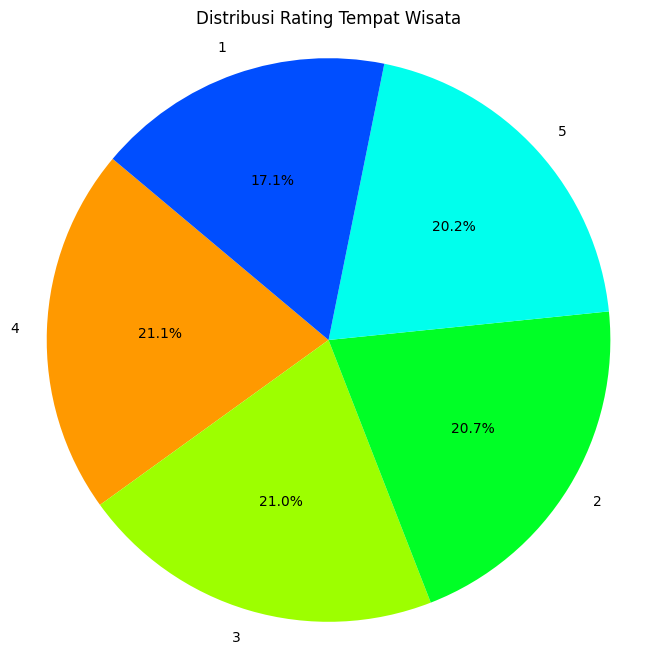

In [ ]:
count = total_id['Place_Ratings'].value_counts()
percent = 100 * total_id['Place_Ratings'].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sample': count, 'Persentase': percent.round(1)})

plt.figure(figsize=(8, 8))
plt.pie(df['Jumlah sample'], labels=df.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('gist_rainbow'))
plt.title('Distribusi Rating Tempat Wisata')
plt.axis('equal')
plt.show()

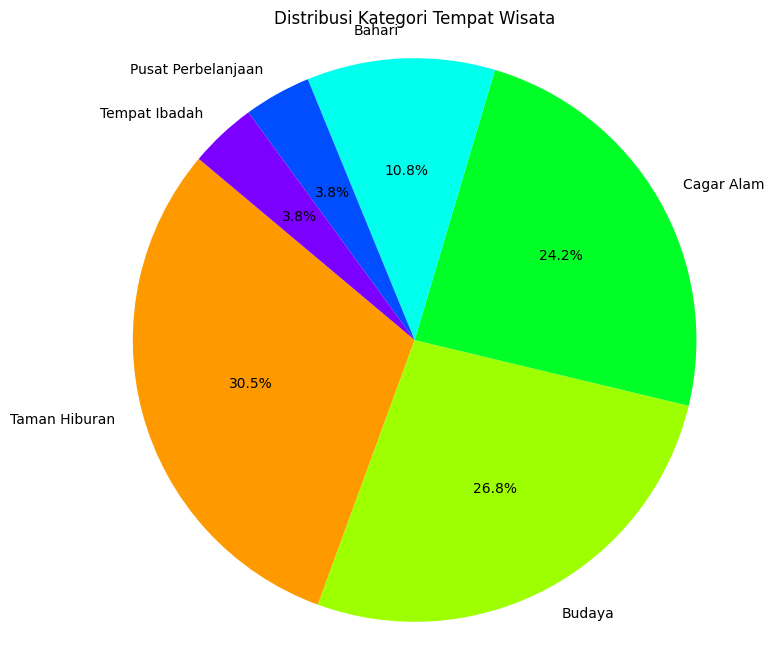

In [ ]:
count = total_id['Category'].value_counts()
percent = 100 * total_id['Category'].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sample': count, 'Persentase': percent.round(1)})

plt.figure(figsize=(8, 8))
plt.pie(df['Jumlah sample'], labels=df.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('gist_rainbow'))
plt.title('Distribusi Kategori Tempat Wisata')
plt.axis('equal')
plt.show()

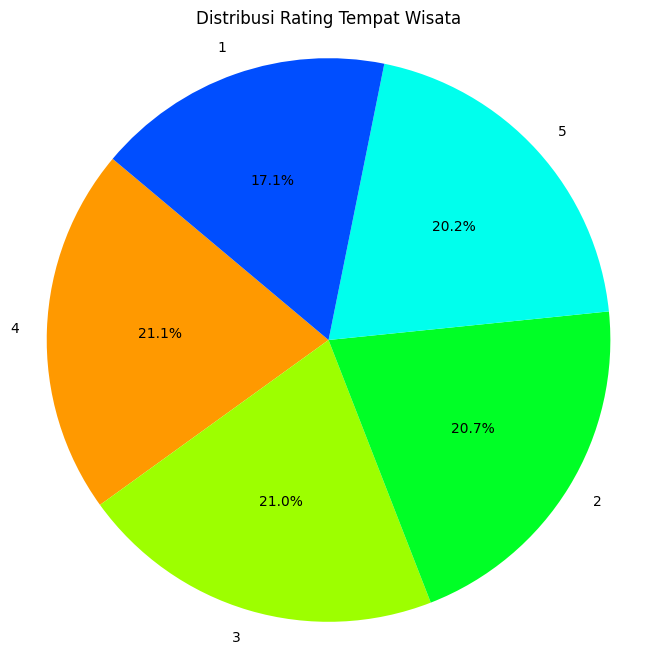

In [ ]:
count = total_id['Place_Ratings'].value_counts()
percent = 100 * total_id['Place_Ratings'].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sample': count, 'Persentase': percent.round(1)})

plt.figure(figsize=(8, 8))
plt.pie(df['Jumlah sample'], labels=df.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('gist_rainbow'))
plt.title('Distribusi Rating Tempat Wisata')
plt.axis('equal')
plt.show()


# Content Based Filtering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
sort_data = total_id
sort_data.sort_values('Place_Id')

,User_Id,Place_Id,Place_Ratings,Category,Place_Name
6236,187,1,4,Budaya,Monumen Nasional
5348,162,1,5,Budaya,Monumen Nasional
5610,169,1,5,Budaya,Monumen Nasional
2089,64,1,2,Budaya,Monumen Nasional
5231,159,1,1,Budaya,Monumen Nasional
...,...,...,...,...,...
8710,263,437,5,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya
6209,187,437,5,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya
7082,213,437,4,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya
6041,182,437,1,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya


In [ ]:
sort_data = sort_data.drop_duplicates('Place_Id')
sort_data

,User_Id,Place_Id,Place_Ratings,Category,Place_Name
0,1,179,3,Budaya,Candi Ratu Boko
1,1,344,2,Bahari,Pantai Marina
2,1,5,5,Taman Hiburan,Atlantis Water Adventure
3,1,373,3,Budaya,Museum Kereta Ambarawa
4,1,101,4,Budaya,Kampung Wisata Sosro Menduran
...,...,...,...,...,...
2008,62,370,1,Budaya,Benteng Pendem
2399,74,350,4,Bahari,Pantai Cipta
2448,75,10,2,Bahari,Pulau Tidung
2534,78,7,4,Cagar Alam,Kebun Binatang Ragunan


In [ ]:
place_id = sort_data['Place_Id'].tolist()
place_category = sort_data['Category'].tolist()
place_name = sort_data['Place_Name'].tolist()

print(len(place_id))
print(len(place_category))
print(len(place_name))

437
437
437


In [ ]:
recommendation = pd.DataFrame({
    'id' : place_id,
    'place_category' : place_category,
    'place_name' : place_name
})

recommendation

,id,place_category,place_name
0,179,Budaya,Candi Ratu Boko
1,344,Bahari,Pantai Marina
2,5,Taman Hiburan,Atlantis Water Adventure
3,373,Budaya,Museum Kereta Ambarawa
4,101,Budaya,Kampung Wisata Sosro Menduran
...,...,...,...
432,370,Budaya,Benteng Pendem
433,350,Bahari,Pantai Cipta
434,10,Bahari,Pulau Tidung
435,7,Cagar Alam,Kebun Binatang Ragunan


In [ ]:
fix_data = recommendation
fix_data.head()

,id,place_category,place_name
0,179,Budaya,Candi Ratu Boko
1,344,Bahari,Pantai Marina
2,5,Taman Hiburan,Atlantis Water Adventure
3,373,Budaya,Museum Kereta Ambarawa
4,101,Budaya,Kampung Wisata Sosro Menduran


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['place_category'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['place_name'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_4, *['place_category', 'place_name'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_5, *['id', 'place_category'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_6, *['id', 'place_name'], **{'inner': 'stick'})
chart

In [ ]:
tf = TfidfVectorizer()
tf.fit(fix_data['place_name'])
tf.get_feature_names_out()

array(['3d', '45', '825', 'abang', 'abdullah', 'ade', 'adhyatma',
       'adventure', 'africa', 'afrika', 'agro', 'agrowisata', 'agung',
       'ahmad', 'air', 'aji', 'akbar', 'al', 'alam', 'alive', 'alun',
       'amazing', 'ambarawa', 'ancol', 'and', 'anggrek', 'angke',
       'angklung', 'anom', 'anteng', 'api', 'aquarium', 'ardilla', 'argo',
       'art', 'artha', 'aseupan', 'asia', 'asri', 'atlantis', 'ayodya',
       'babakan', 'badak', 'baduga', 'bahari', 'balai', 'bambu',
       'banaran', 'bandros', 'bandung', 'bangsal', 'bangunrejo', 'bank',
       'bantal', 'banteng', 'barat', 'barli', 'barn', 'baron', 'baru',
       'baruna', 'barunawati', 'basoeki', 'batik', 'batu', 'batununggal',
       'bay', 'bbws', 'bby', 'becici', 'begonia', 'belanda', 'bendung',
       'bening', 'bentara', 'benteng', 'berdosa', 'beringharjo', 'bibit',
       'bidadari', 'binatang', 'bintang', 'bintaran', 'biru', 'blaster',
       'blenduk', 'blue', 'boko', 'borobudur', 'bosscha', 'braga',
       'bra

In [ ]:
tfdif_matrix = tf.fit_transform(fix_data['place_name'])
tfdif_matrix.shape

(437, 712)

In [ ]:
tfdif_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(
    tfdif_matrix.todense(),
    columns = tf.get_feature_names_out(),
    index = fix_data.place_category
).sample(22, axis = 1).sample(10, axis = 0)

,pelangi,perkebunan,view,petak,opat,house,crana,lepen,fatahillah,safari,...,papandayan,srengseng,emas,cibubur,al,kediwung,empring,rabbit,rawa,perkemahan
place_category,,,,,,,,,,,,,,,,,,,,,
Budaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tempat Ibadah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cagar Alam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taman Hiburan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cagar Alam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taman Hiburan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Budaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Budaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taman Hiburan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Menghitung cosine similarity
cosine_sim = cosine_similarity(tfdif_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#Membuat dataframe dari var cosine_sim dengan baris dan kolom berupa nama tempat
cosine_sim_df = pd.DataFrame(cosine_sim, index = fix_data['place_name'], columns = fix_data['place_name'])
print('Shape : ', cosine_sim_df.shape)

# Melihat similarity matrix
cosine_sim_df.sample(22, axis = 1).sample(10, axis = 0)

Shape :  (437, 437)


place_name,Hutan Mangrove Kulon Progo,Margasatwa Muara Angke,Sumur Gumuling,Pesona Nirwana Waterpark & Cottages,Curug Cipanas,Bukit Bintang Yogyakarta,Pantai Patihan,Monumen Serangan Umum 1 Maret,Tugu Pal Putih Jogja,Pantai Jungwok,...,Sudut Pandang Bandung,Museum Tengah Kebun,Hutan Kota Srengseng,Monumen Nasional,Sea World,Istana Negara Republik Indonesia,Bukit Lintang Sewu,Wisata Kaliurang,Kampoeng Kopi Banaran,Pantai Krakal
place_name,,,,,,,,,,,,,,,,,,,,,
Pantai Baruna,0.0,0.0,0.0,0.0,0.000000,0.000000,0.217524,0.0,0.0,0.217524,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.217524
Kampoeng Kopi Banaran,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000
Dunia Fantasi,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
Taman Jomblo,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
Taman Sejarah Bandung,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.209856,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
Museum Ullen Sentalu,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.133293,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
Curug Cilengkrang,0.0,0.0,0.0,0.0,0.341136,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
Grand Indonesia Mall,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.199456,0.0,0.0,0.0,0.000000
Kauman Pakualaman Yogyakarta,0.0,0.0,0.0,0.0,0.000000,0.222734,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
def indonesia_tourism_recommendations(name, similarity_data = cosine_sim_df, items = fix_data[['place_name', 'place_category']], k = 5) :

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi
    # Mengubah menjadi numpy

  index = similarity_data.loc[:, name].to_numpy().argpartition(
      range(-1, -k, -1)
  )

  recommend = similarity_data.columns[index[-1:-(k+2):-1]]
  recommend = recommend.drop(name, errors = 'ignore')

  return pd.DataFrame(recommend).merge(items).head(k)

In [ ]:
fix_data[fix_data.place_name.eq('Monumen Nasional')]

,id,place_category,place_name
400,1,Budaya,Monumen Nasional


In [ ]:
indonesia_tourism_recommendations('Monumen Nasional')

,place_name,place_category
0,Museum Nasional,Budaya
1,Perpustakaan Nasional,Budaya
2,Museum Kebangkitan Nasional,Budaya
3,Museum Pendidikan Nasional,Budaya
4,Galeri Nasional Indonesia,Budaya


# Modelling

In [ ]:
data_cf = rating.copy()
data_cf

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [ ]:
user_list_count = data_cf['User_Id'].unique().tolist()
print('list userID: ', user_list_count)

user_to_user_encoded = {x: i for i, x in enumerate(user_list_count)}
print('proses encode : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_list_count)}
print('encode ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [ ]:
places_list_count = data_cf['Place_Id'].unique().tolist()

places_to_places_encoded = {x: i for i, x in enumerate(places_list_count)}

places_encoded_to_places = {i: x for i, x in enumerate(places_list_count)}

In [ ]:
data_cf['user'] = data_cf['User_Id'].map(user_to_user_encoded)

# Melakukan proses mapping 'PlaceID'
data_cf['places'] = data_cf['Place_Id'].map(places_to_places_encoded)


In [ ]:
data_cf

,User_Id,Place_Id,Place_Ratings,user,places
0,1,179,3,0,0
1,1,344,2,0,1
2,1,5,5,0,2
3,1,373,3,0,3
4,1,101,4,0,4
...,...,...,...,...,...
9995,300,425,2,299,324
9996,300,64,4,299,132
9997,300,311,3,299,348
9998,300,279,4,299,290


In [ ]:
# Melihat Jumlah User
total_user = len(user_to_user_encoded)
print(total_user)

# Melihat Jumlah places
total_places = len(places_encoded_to_places)
print(total_places)

data_cf['Place_Ratings'] = data_cf['Place_Ratings'].values.astype(np.float32)
min_rating = min(data_cf['Place_Ratings'])
max_rating = max(data_cf['Place_Ratings'])

print('Number of User: {}, Number of places: {}, Min Rating: {}, Max Rating: {}'.format(
    total_user, total_places, min_rating, max_rating
))

300
437
Number of User: 300, Number of places: 437, Min Rating: 1.0, Max Rating: 5.0


In [ ]:
data_cf = data_cf.sample(frac=1, random_state=123)
data_cf

,User_Id,Place_Id,Place_Ratings,user,places
2656,82,33,4.0,81,66
445,15,417,3.0,14,177
9505,286,395,5.0,285,105
332,12,301,5.0,11,116
4168,127,418,2.0,126,304
...,...,...,...,...,...
9785,294,6,5.0,293,218
7763,233,246,1.0,232,22
5218,158,233,2.0,157,189
1346,42,84,2.0,41,305


# Data Splitting

In [ ]:
X = data_cf[['user', 'places']].values

# Membuat variabel y untuk membuat rating dari hasil
Y = data_cf['Place_Ratings'].apply(lambda X: (X - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data_cf.shape[0])
X_train, X_val, Y_train, Y_val = (
    X[:train_indices],
    X[train_indices:],
    Y[:train_indices],
    Y[train_indices:]
)

print(X, Y)

[[ 81  66]
 [ 14 177]
 [285 105]
 ...
 [157 189]
 [ 41 305]
 [108 369]] [0.75 0.5  1.   ... 0.25 0.25 0.  ]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, total_user, total_places, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.total_user = total_user
        self.total_places = total_places
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            total_user,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(total_user, 1)
        self.places_embedding = layers.Embedding(
            total_places,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.places_bias = layers.Embedding(total_places, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        places_vector = self.places_embedding(inputs[:, 1])
        places_bias = self.places_bias(inputs[:, 1])

        dot_user_places = tf.tensordot(user_vector, places_vector, 2)

        x = dot_user_places + user_bias + places_bias

        return tf.nn.sigmoid(x)


In [ ]:
model = RecommenderNet(total_user, total_places, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Training Process

hist = model.fit(
    x = X_train,  # Use lowercase 'x'
    y = Y_train,  # Use lowercase 'y'
    batch_size=8,
    epochs=100,
    validation_data=(X_val, Y_val)
)

Epoch 1/100
1000/1000 [==============================] - 4s 3ms/step - loss: 0.6945 - root_mean_squared_error: 0.3463 - val_loss: 0.6939 - val_root_mean_squared_error: 0.3453
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6860 - root_mean_squared_error: 0.3401 - val_loss: 0.6949 - val_root_mean_squared_error: 0.3460
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6800 - root_mean_squared_error: 0.3358 - val_loss: 0.6964 - val_root_mean_squared_error: 0.3471
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6747 - root_mean_squared_error: 0.3319 - val_loss: 0.6981 - val_root_mean_squared_error: 0.3482
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6723 - root_mean_squared_error: 0.3301 - val_loss: 0.6996 - val_root_mean_squared_error: 0.3493
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6677 - root_mean_squared_error: 0.3267 - val_l

In [ ]:
places_df = id
df = rating

user_id = df.User_Id.sample(1).iloc[0]
places_visited_by_user = df[df.User_Id == user_id]

In [ ]:
places_not_visited = places_df[~places_df['Place_Id'].isin(places_visited_by_user.Place_Id.values)]['Place_Id']
places_not_visited = list(
    set(places_not_visited)
    .intersection(set(places_to_places_encoded.keys()))
)

places_not_visited = [[places_to_places_encoded.get(x)] for x in places_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_places_array = np.hstack(
    ([[user_encoder]] * len(places_not_visited), places_not_visited)
)

# Melakukan Prediksi

In [ ]:
from prettytable import PrettyTable

ratings = model.predict(user_places_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_places_total = [
    places_encoded_to_places.get(places_not_visited[x][0]) for x in top_ratings_indices
]

#Show Hasil
print('Menampilkan Hasil Rekomendasi : {}'.format(user_id))
print('===' * 9)
print('Tempat Tertinggi Berdasarkan Rating ')
print('----' * 8)

top_places_user = (
    places_visited_by_user.sort_values(
        by='Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

places_df_rows = places_df[places_df['Place_Id'].isin(top_places_user)]
top_places_df = pd.DataFrame(places_df_rows, columns=['Place_Id', 'Place_Name'])

top_places_table = PrettyTable()
top_places_table.field_names = top_places_df.columns
for row in top_places_df.itertuples(index=False):
    top_places_table.add_row(row)
print(top_places_table)

print('----' * 8)
print('10 Rekomendasi Teratas')
print('----' * 8)

recommended_places = places_df[places_df['Place_Id'].isin(recommended_places_total)]
recommended_places_df = pd.DataFrame(recommended_places, columns=['Place_Id', 'Place_Name'])

recommended_places_table = PrettyTable()
recommended_places_table.field_names = recommended_places_df.columns
for row in recommended_places_df.itertuples(index=False):
    recommended_places_table.add_row(row)
print(recommended_places_table)


13/13 [==============================] - 0s 2ms/step
Menampilkan Hasil Rekomendasi : 260
Tempat Tertinggi Berdasarkan Rating 
--------------------------------
+----------+--------------------------+
| Place_Id |        Place_Name        |
+----------+--------------------------+
|    37    | Bumi Perkemahan Cibubur  |
|   211    |  GunungTangkuban perahu  |
|   224    |      Dago Dreampark      |
|   256    |     Wisata Batu Kuda     |
|   325    | Saung Angklung Mang Udjo |
+----------+--------------------------+
--------------------------------
10 Rekomendasi Teratas
--------------------------------
+----------+----------------------------+
| Place_Id |         Place_Name         |
+----------+----------------------------+
|    83    |     Alive Museum Ancol     |
|    92    | Nol Kilometer Jl.Malioboro |
|    94    |       Sumur Gumuling       |
|    97    |   Monumen Yogya Kembali    |
|   112    |  Bukit Bintang Yogyakarta  |
|   122    |        Watu Goyang         |
|   132    |  

# Metric evaluations

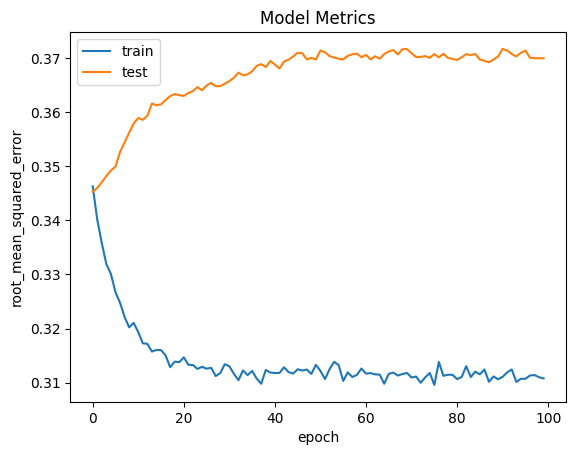

In [ ]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
#Kalo mau cek rekomendasi lain

#indonesia_tourism_recommendations('Sebut Tempatnya')